### Event study in Stocks prices

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import causalpy as cp
import seaborn as sns
plt.style.use('fivethirtyeight')


In [63]:
df = pd.read_excel('Stocks_prices.xlsx', parse_dates=True, index_col=0)

In [64]:
df.dropna(inplace=True)
df = df.pct_change().dropna()

In [65]:
df.describe()

,MEEG,SHOW3,CINE1,AZUL
count,914.000000,914.000000,914.000000,914.000000
mean,0.001375,0.002177,0.000264,0.000206
std,0.068694,0.043398,0.027271,0.014142
min,-0.279894,-0.210169,-0.149604,-0.106092
25%,-0.021349,-0.019157,-0.007674,-0.007183
50%,0.001170,0.002551,0.000038,-0.000059
75%,0.022326,0.023011,0.007798,0.007002
max,0.368405,0.260331,0.185786,0.112913


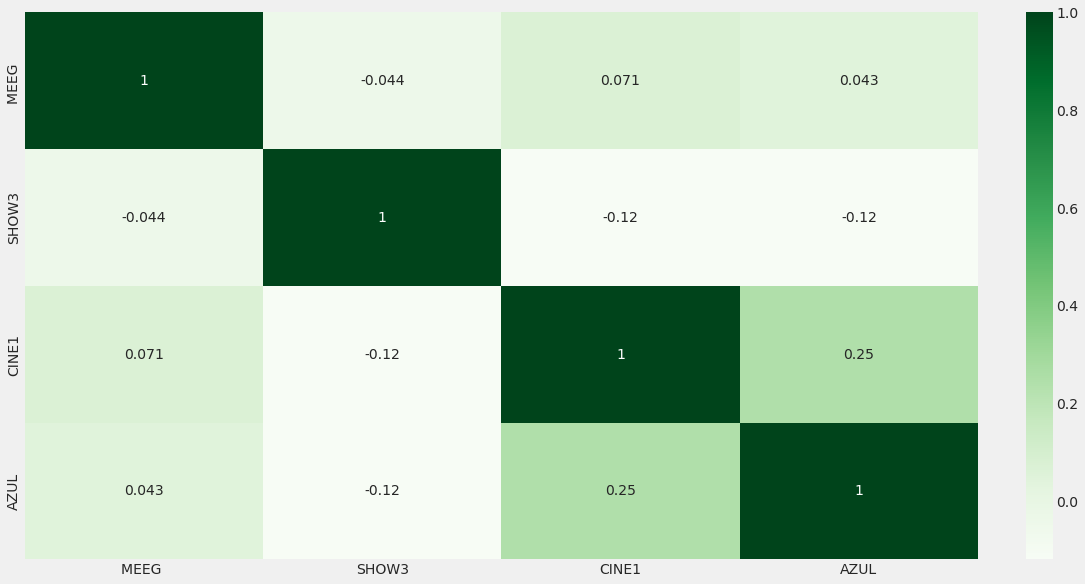

In [66]:
plt.figure(figsize=(15, 8))
grap = sns.heatmap(df.corr(), cmap='Greens', annot=True)

In [67]:
df = df.loc['2021-01-01':]

C:\Users\Jhona\AppData\Local\Temp/ipykernel_17896/596706931.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df = df.loc['2021-01-01':]


In [68]:
event = pd.to_datetime('2022-09-06')

In [69]:
model = cp.pymc_models.WeightedSumFitter()

In [72]:
formula = 'SHOW3 ~ 0 + CINE1 + AZUL + MEEG '

In [73]:
results = cp.pymc_experiments.SyntheticControl(
    df,
    event,
    formula=formula,
    model=model,
)

PatsyError: Error evaluating factor: NameError: name 'MEEG' is not defined
    SHOW3 ~ 0 + CINE1 + AZUL + MEEG
                               ^^^^

<Figure size 1080x576 with 0 Axes>

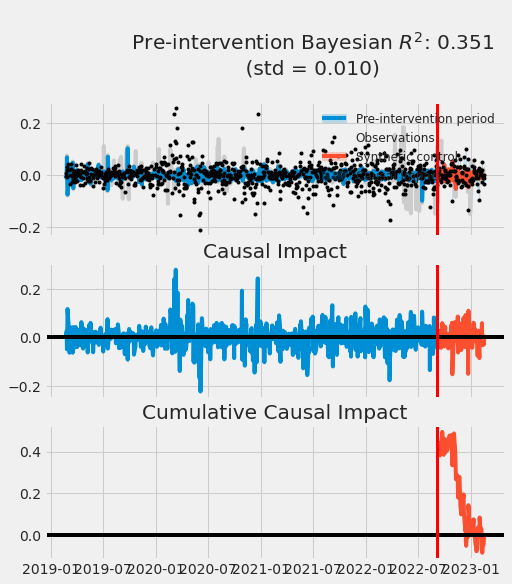

In [56]:
plt.figure(figsize=(15, 8))
esults.plot(plot_predictors=True)
plt.show()